#**Importing Libraries**

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#connect to google dirve
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Loading model**

In [4]:
cnn = tf.keras.models.load_model('/content/trained_model.h5')

## Performing prediction on single image

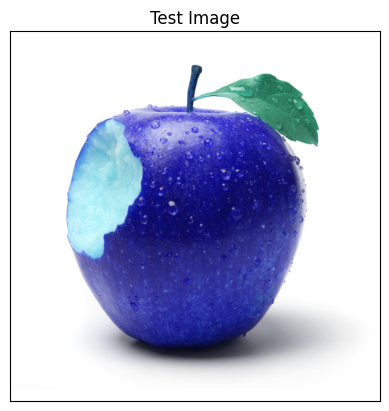

In [5]:
import cv2
image_path = '/content/drive/MyDrive/fruit_and_vegetable_recognition_system/test/apple/Image_1.jpg'
img = cv2.imread(image_path)
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

#**Testing Model**

In [6]:
image = tf.keras.preprocessing.image.load_img(image_path, target_size=(64, 64))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 304ms/step


In [7]:
print(predictions[0])
print(max(predictions[0]))

[1.00000000e+00 8.53677374e-36 5.81296848e-27 6.38904612e-20
 0.00000000e+00 1.24122275e-11 5.22452597e-34 0.00000000e+00
 1.34813663e-26 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 3.03906730e-35 1.43177058e-33
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.08456271e-38
 9.62060187e-18 2.17830245e-29 3.53567985e-14 1.05938453e-33
 0.00000000e+00 1.03812083e-27 1.37298322e-23 1.48276552e-31
 2.27165324e-21 0.00000000e+00 0.00000000e+00 0.00000000e+00
 7.87010336e-32 3.97235831e-23 9.75180930e-33 6.92314480e-18]
1.0


In [8]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/fruit_and_vegetable_recognition_system/test',
    labels = 'inferred',
    label_mode = 'categorical',
    batch_size = 32,
    image_size = (64,64),
    color_mode = 'rgb',
    shuffle = True,
    seed = None,
    validation_split = None,
    subset = None,
    interpolation = 'bilinear',
    follow_links = False,
    crop_to_aspect_ratio = False
)

Found 359 files belonging to 36 classes.


In [9]:
test_set.class_names

['apple',
 'banana',
 'beetroot',
 'bell pepper',
 'cabbage',
 'capsicum',
 'carrot',
 'cauliflower',
 'chilli pepper',
 'corn',
 'cucumber',
 'eggplant',
 'garlic',
 'ginger',
 'grapes',
 'jalepeno',
 'kiwi',
 'lemon',
 'lettuce',
 'mango',
 'onion',
 'orange',
 'paprika',
 'pear',
 'peas',
 'pineapple',
 'pomegranate',
 'potato',
 'raddish',
 'soy beans',
 'spinach',
 'sweetcorn',
 'sweetpotato',
 'tomato',
 'turnip',
 'watermelon']

In [36]:
file = open("labels.txt", "w")
for i in test_set.class_names:
  file.write( i + '\n')
file.close()

In [37]:
# We no longer need to read from the labels.txt file
with open('labels.txt') as f:
   content = f.readlines()

In [38]:
content

['apple\n',
 'banana\n',
 'beetroot\n',
 'bell pepper\n',
 'cabbage\n',
 'capsicum\n',
 'carrot\n',
 'cauliflower\n',
 'chilli pepper\n',
 'corn\n',
 'cucumber\n',
 'eggplant\n',
 'garlic\n',
 'ginger\n',
 'grapes\n',
 'jalepeno\n',
 'kiwi\n',
 'lemon\n',
 'lettuce\n',
 'mango\n',
 'onion\n',
 'orange\n',
 'paprika\n',
 'pear\n',
 'peas\n',
 'pineapple\n',
 'pomegranate\n',
 'potato\n',
 'raddish\n',
 'soy beans\n',
 'spinach\n',
 'sweetcorn\n',
 'sweetpotato\n',
 'tomato\n',
 'turnip\n',
 'watermelon\n']

In [14]:
result_index = np.where(predictions[0] == max(predictions[0]))
print(result_index[0][0])

0


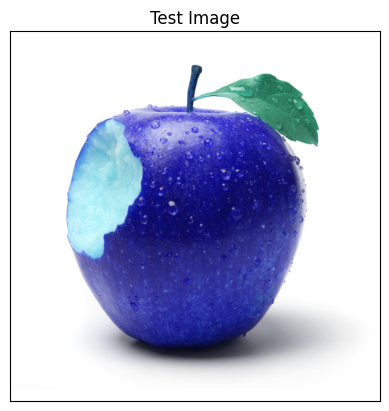

In [15]:
#Display_image
plt.imshow(img)
plt.title("Test Image")
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
#Single prediction
print("its {}".format(test_set.class_names[result_index[0][0]]))

its apple
